In [1]:
import pandas as pd

import datetime as dt
import sys
sys.path.append("../")


In [2]:
from Infrastructure.instrument_collection import InstrumentCollection
from ploting import CandlePlot

In [3]:
pair="EUR_USD"
granularity="H4"
df= pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST=[10,20,50,100,200]

In [4]:
df

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
0,2024-02-13 14:00:00+00:00,27806,1.07085,1.07270,1.07006,1.07155,1.07078,1.07263,1.06999,1.07148,1.07092,1.07277,1.07014,1.07162
1,2024-02-13 18:00:00+00:00,10937,1.07153,1.07204,1.07006,1.07094,1.07146,1.07197,1.06999,1.07087,1.07160,1.07211,1.07013,1.07101
2,2024-02-13 22:00:00+00:00,6565,1.07100,1.07146,1.07034,1.07118,1.07081,1.07138,1.07026,1.07111,1.07120,1.07154,1.07041,1.07125
3,2024-02-14 02:00:00+00:00,6689,1.07116,1.07152,1.07082,1.07141,1.07109,1.07145,1.07075,1.07133,1.07123,1.07159,1.07089,1.07149
4,2024-02-14 06:00:00+00:00,15669,1.07140,1.07188,1.06950,1.07000,1.07133,1.07181,1.06942,1.06993,1.07148,1.07196,1.06957,1.07008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-06-07 01:00:00+00:00,6395,1.08896,1.08980,1.08872,1.08953,1.08889,1.08972,1.08864,1.08946,1.08904,1.08987,1.08879,1.08960
496,2024-06-07 05:00:00+00:00,11135,1.08954,1.08986,1.08832,1.08890,1.08946,1.08978,1.08824,1.08883,1.08961,1.08993,1.08839,1.08898
497,2024-06-07 09:00:00+00:00,18778,1.08892,1.09023,1.08242,1.08332,1.08883,1.09016,1.08235,1.08325,1.08900,1.09030,1.08249,1.08339
498,2024-06-07 13:00:00+00:00,21210,1.08328,1.08359,1.08033,1.08052,1.08321,1.08352,1.08026,1.08045,1.08336,1.08366,1.08040,1.08059


In [5]:
df_ma=df[['time','mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [6]:
for ma in MA_LIST:
    df_ma[f"MA_{ma}"]= df_ma.mid_c.rolling(window=ma).mean()
df_ma=df_ma.dropna()
df_ma.reset_index(inplace=True, drop=True)

In [69]:
df_plot=df_ma.iloc[:1000]
df_plot


,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,MA_50,MA_100,MA_200
0,2024-03-29 17:00:00+00:00,1.07884,1.07987,1.07882,1.07932,1.079076,1.080834,1.083533,1.087440,1.084373
1,2024-03-31 21:00:00+00:00,1.07915,1.07989,1.07855,1.07914,1.079069,1.080649,1.083389,1.087329,1.084411
2,2024-04-01 01:00:00+00:00,1.07914,1.07948,1.07842,1.07868,1.078855,1.080427,1.083230,1.087244,1.084449
3,2024-04-01 05:00:00+00:00,1.07868,1.07923,1.07828,1.07899,1.078761,1.080229,1.083081,1.087097,1.084488
4,2024-04-01 09:00:00+00:00,1.07898,1.07909,1.07772,1.07819,1.078704,1.079989,1.082911,1.086930,1.084522
...,...,...,...,...,...,...,...,...,...,...
296,2024-06-07 01:00:00+00:00,1.08896,1.08980,1.08872,1.08953,1.088186,1.088356,1.086083,1.085697,1.079789
297,2024-06-07 05:00:00+00:00,1.08954,1.08986,1.08832,1.08890,1.088432,1.088237,1.086131,1.085714,1.079904
298,2024-06-07 09:00:00+00:00,1.08892,1.09023,1.08242,1.08332,1.088071,1.087856,1.086046,1.085664,1.079993
299,2024-06-07 13:00:00+00:00,1.08328,1.08359,1.08033,1.08052,1.087303,1.087477,1.085916,1.085575,1.080061


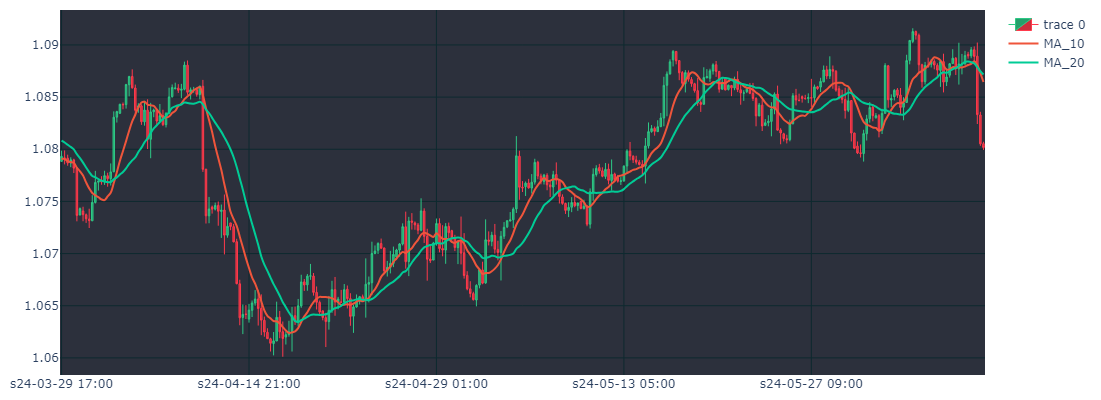

In [70]:
cp=CandlePlot(df_plot, True)
cp.show_plot(line_traces=["MA_10","MA_20"])

In [71]:
df_ma.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,MA_50,MA_100,MA_200
0,2024-03-29 17:00:00+00:00,1.07884,1.07987,1.07882,1.07932,1.079076,1.080834,1.083533,1.087440,1.084373
1,2024-03-31 21:00:00+00:00,1.07915,1.07989,1.07855,1.07914,1.079069,1.080649,1.083389,1.087329,1.084411
2,2024-04-01 01:00:00+00:00,1.07914,1.07948,1.07842,1.07868,1.078855,1.080427,1.083230,1.087244,1.084449
3,2024-04-01 05:00:00+00:00,1.07868,1.07923,1.07828,1.07899,1.078761,1.080229,1.083081,1.087097,1.084488
4,2024-04-01 09:00:00+00:00,1.07898,1.07909,1.07772,1.07819,1.078704,1.079989,1.082911,1.086930,1.084522


In [72]:
MA_S="MA_50"
MA_L="MA_200"
BUY=1
SELL= -1
NONE=0

In [73]:
df_an=df_ma[['time','mid_o', 'mid_h', 'mid_l', 'mid_c',MA_S,MA_L]].copy()

In [74]:
df_an["DELTA"]=df_an.MA_50-df_an.MA_200
df_an["DELTA_PREV"]=df_an.DELTA.shift(1)

In [75]:
 def is_trade(row):
        if row.DELTA>=0 and row.DELTA_PREV<0:
            return BUY
        elif row.DELTA<0 and row.DELTA_PREV>=0:
            return SELL
        else:
            return NONE
        

In [76]:
df_an["TRADE"]=df_an.apply(is_trade, axis=1)

In [77]:
df_an

,time,mid_o,mid_h,mid_l,mid_c,MA_50,MA_200,DELTA,DELTA_PREV,TRADE
0,2024-03-29 17:00:00+00:00,1.07884,1.07987,1.07882,1.07932,1.083533,1.084373,-0.000840,NaN,0
1,2024-03-31 21:00:00+00:00,1.07915,1.07989,1.07855,1.07914,1.083389,1.084411,-0.001022,-0.000840,0
2,2024-04-01 01:00:00+00:00,1.07914,1.07948,1.07842,1.07868,1.083230,1.084449,-0.001219,-0.001022,0
3,2024-04-01 05:00:00+00:00,1.07868,1.07923,1.07828,1.07899,1.083081,1.084488,-0.001407,-0.001219,0
4,2024-04-01 09:00:00+00:00,1.07898,1.07909,1.07772,1.07819,1.082911,1.084522,-0.001611,-0.001407,0
...,...,...,...,...,...,...,...,...,...,...
296,2024-06-07 01:00:00+00:00,1.08896,1.08980,1.08872,1.08953,1.086083,1.079789,0.006294,0.006341,0
297,2024-06-07 05:00:00+00:00,1.08954,1.08986,1.08832,1.08890,1.086131,1.079904,0.006227,0.006294,0
298,2024-06-07 09:00:00+00:00,1.08892,1.09023,1.08242,1.08332,1.086046,1.079993,0.006053,0.006227,0
299,2024-06-07 13:00:00+00:00,1.08328,1.08359,1.08033,1.08052,1.085916,1.080061,0.005855,0.006053,0


In [78]:
df_trades=df_an[df_an.TRADE!=0].copy()

In [79]:
ic =InstrumentCollection()

In [80]:
ic.LoadInstruments(path='../data')

In [81]:
ins_data=ic.instruments_dict[pair]

In [82]:
df_trades.head()


,time,mid_o,mid_h,mid_l,mid_c,MA_50,MA_200,DELTA,DELTA_PREV,TRADE
179,2024-05-10 13:00:00+00:00,1.07701,1.07902,1.07604,1.07759,1.074065,1.073992,0.000073,-0.000093,1


In [83]:
df_trades["DIFF"]=df_trades.mid_c.diff().shift(-1)
df_trades.fillna(0,inplace=True)

In [84]:
df_trades["GAIN"]=df_trades["DIFF"]/ins_data.pipLocation
df_trades["GAIN"]=df_trades["GAIN"]*df_trades["TRADE"]


In [85]:
df_trades.GAIN.sum()

0.0

In [86]:
df_trades["GAIN_C"]= df_trades["GAIN"].cumsum()

In [2]:
def create_data_file(pair_name, count=10, granularity="H1"):
    code, data=fetch_candles(pair_name,count,granularity)
    if code != 200:
        print("Failed",pair_name,data)
        return
    if len(data)==0:
        print("No candles", pair_name)
        
    #SAVE DATA TO PICKLE FILE
    
    candles_df=get_candles_df(data)
    candles_df.to_pickle(f"data/{pair_name}_{granularity}.pkl")
    
    print(f"{pair_name} {granularity} {candles_df.shape[0]} candles, {candles_df.time.min()} {candles_df.time.max()}")   

In [4]:
our_curr=["EUR","USD","GBP","JPY","CHF","NZD","CAD","AUD"]

In [5]:
cp=CandlePlot(df_trades, candles=False)
cp.show_plot(line_traces=["GAIN_C"])

NameError: name 'CandlePlot' is not defined

In [6]:
for p1 in our_curr:
    for p2 in our_curr:
        pr=f"{p1}_{p2}"
        if pr in instrument_dict:
            for g in ["H1","H4"]:
                create_data_file(pr, count=4001,granularity=g)

NameError: name 'instrument_dict' is not defined